In [1]:
from spectacle.core.spectrum import Spectrum1D
from spectacle.models.custom import Masker
from spectacle.analysis.statistics import delta_v_90

import numpy as np
import astropy.units as u

import matplotlib.pyplot as plt

%matplotlib notebook

In [2]:
# Define the dispersion
wavelength = np.linspace(1210, 1250, 1001) * u.Angstrom
velocity = np.linspace(-800, 800, 1000) * u.Unit("km/s")

# Create the first spectrum with a single line
line1 = dict(name="HI1216", v_doppler=1e6 * u.Unit('cm/s'), 
             column_density=1e13 * u.Unit('1/cm2'))

spectrum1 = Spectrum1D(center=1216).add_line(**line1)

# Create flux and tau profiles with masks
x1_t, y1_t = Masker(rel_tol=1e-2, abs_tol=1e-4)(velocity[:-1], spectrum1.tau(velocity[:-1]))
# x1_f, y1_f = Masker(continuum=np.ones(velocity.shape))(velocity, spectrum1.flux(velocity))

# Create the second spectrum with a single line
line2 = dict(name="HI1216", v_doppler=1e7 * u.Unit('cm/s'), 
             column_density=1e13 * u.Unit('1/cm2'), 
             delta_v=50000000 * u.Unit('cm/s'))

spectrum2 = Spectrum1D(center=1216).add_line(**line2)

# Create flux and tau profiles with masks
x2_t, y2_t = Masker()(velocity, spectrum2.tau(velocity))
# x2_f, y2_f = Masker(continuum=np.ones(velocity.shape))(velocity, spectrum2.flux(velocity))

<IPython.core.display.Javascript object>


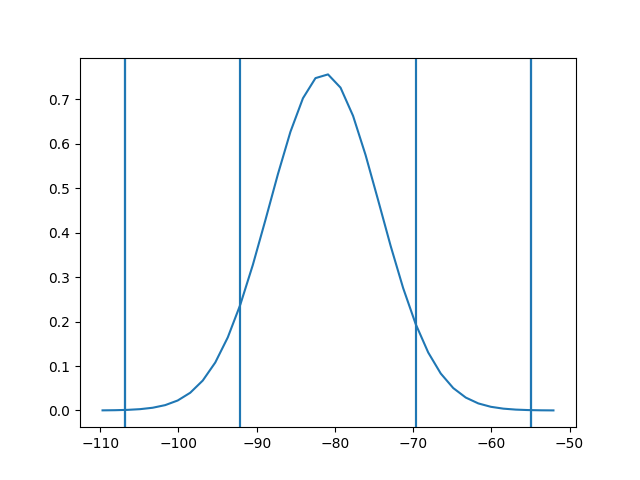

In [3]:
f, ax = plt.subplots()

ax.plot(x1_t, y1_t)

In [24]:
from pandas import DataFrame

df = DataFrame(list(zip(x1_t.compressed().value, y1_t.compressed())), columns=('x', 'y'))

for i in [0.05, 0.95]:
    qnt = df.quantile(i)
    ax.axvline(qnt['x'])

mn, mx = delta_v_90(x1_t.compressed(), y1_t.compressed())

[ax.axvline(x.value) for x in [mn, mx]]

-92.092092092092 km / s -69.66966966966959 km / s
